# 🌍 World Happiness Index: EDA & ML Feature Analysis

- **Univariate Analysis**
Explore individual variables to understand their distributions, central tendency (mean, median, mode), and variability (range, standard deviation).
- **Bivariate Analysis**
Investigate relationships between pairs of variables to uncover correlations or group differences.
- **Numerical vs. Numerical**: Pearson & Spearman correlations.
- **Categorical vs. Categorical**: Cross-tabulations and grouped bar charts.

## 3. 📈 Ranking: Top–Bottom Happiness Scores
Rank countries from highest to lowest happiness scores.
- Highlight extremes and regional differences.
- Identify any temporal trends if data includes multiple years.

## 4. 🤖 Feature Importance (ML-driven)
Use predictive modeling to analyze which factors most influence happiness scores.
- Algorithms: Linear Regression, Random Forests, Gradient Boosting.
- Tools: Feature importance plots, SHAP values, model coefficients.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"E:\General\2015.csv")

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## Univariate Analysis

In [7]:
df["Happiness Score"].describe()

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

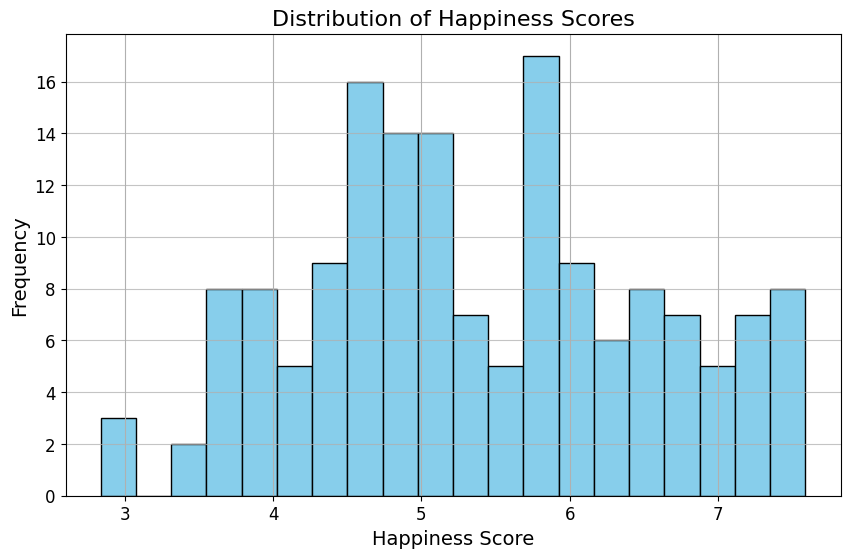

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['Happiness Score'].hist(bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Happiness Scores', fontsize=16)
plt.xlabel('Happiness Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Bivariate Analysis

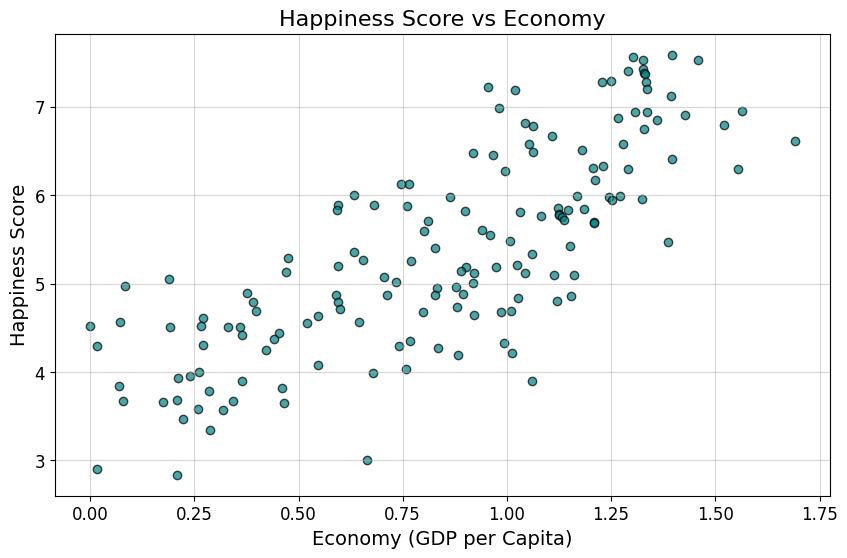

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'], alpha=0.7, color='teal', edgecolors='black')
plt.title('Happiness Score vs Economy', fontsize=16)
plt.xlabel('Economy (GDP per Capita)', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(alpha=0.5)  # Add gridlines for clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [10]:
correlation = df['Happiness Score'].corr(df['Economy (GDP per Capita)'])
print(f"Correlation Coefficient between Happiness Score and Economy: {correlation:.2f}")

Correlation Coefficient between Happiness Score and Economy: 0.78


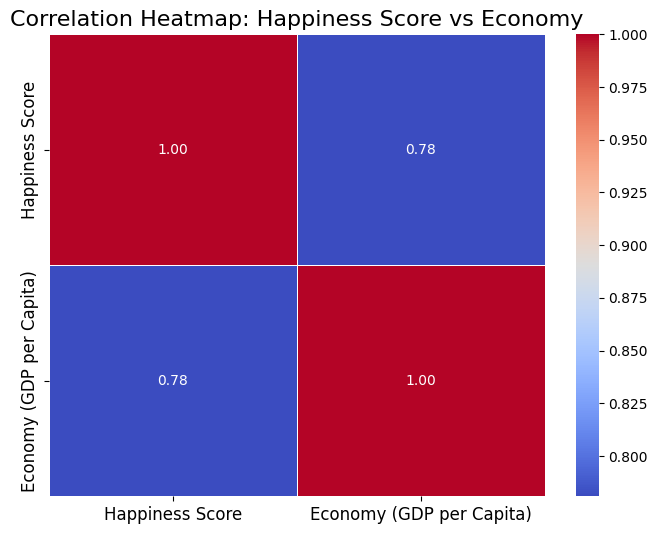

In [11]:
import seaborn as sns

selected_columns = df[['Happiness Score', 'Economy (GDP per Capita)']]

# Compute the correlation matrix
correlation_matrix = selected_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Happiness Score vs Economy', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Top to bottm Analysis
### Top to Bottom countries for happiness

In [12]:

sorted_df = df.sort_values(by='Happiness Score', ascending=False)

# Top 5 happiest countries
top_countries = sorted_df[['Country', 'Happiness Rank', 'Happiness Score', 'Standard Error']].head(5)

# Bottom 5 least happy countries
bottom_countries = sorted_df[['Country', 'Happiness Rank', 'Happiness Score', 'Standard Error']].tail(5)

# Display results
print("Top 5 Happiest Countries:")
print(top_countries)

print("\nBottom 5 Least Happy Countries:")
print(bottom_countries)


Top 5 Happiest Countries:
       Country  Happiness Rank  Happiness Score  Standard Error
0  Switzerland               1            7.587         0.03411
1      Iceland               2            7.561         0.04884
2      Denmark               3            7.527         0.03328
3       Norway               4            7.522         0.03880
4       Canada               5            7.427         0.03553

Bottom 5 Least Happy Countries:
     Country  Happiness Rank  Happiness Score  Standard Error
153   Rwanda             154            3.465         0.03464
154    Benin             155            3.340         0.03656
155    Syria             156            3.006         0.05015
156  Burundi             157            2.905         0.08658
157     Togo             158            2.839         0.06727


### Calculate region-wise average Happiness Score

Region-wise Average Happiness Score:
Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and Eastern Europe         5.332931
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Name: Happiness Score, dtype: float64


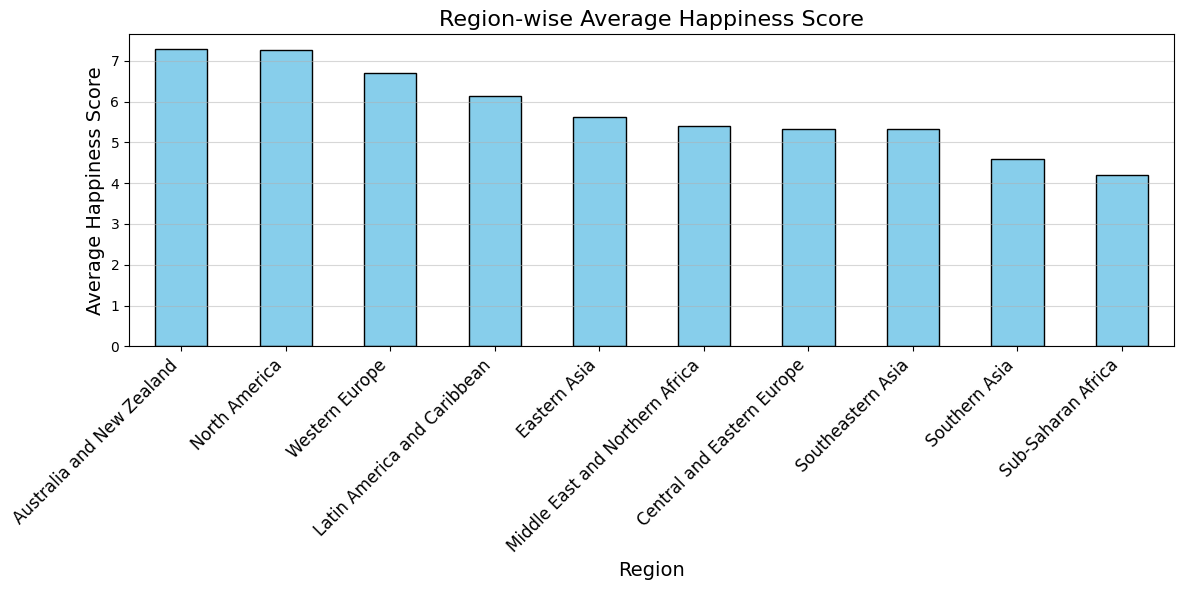

In [13]:
region_avg_happiness = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

# Display the results
print("Region-wise Average Happiness Score:")
print(region_avg_happiness)

# Visualizing the result with a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
region_avg_happiness.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Region-wise Average Happiness Score', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Happiness Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


### Feature Analysis

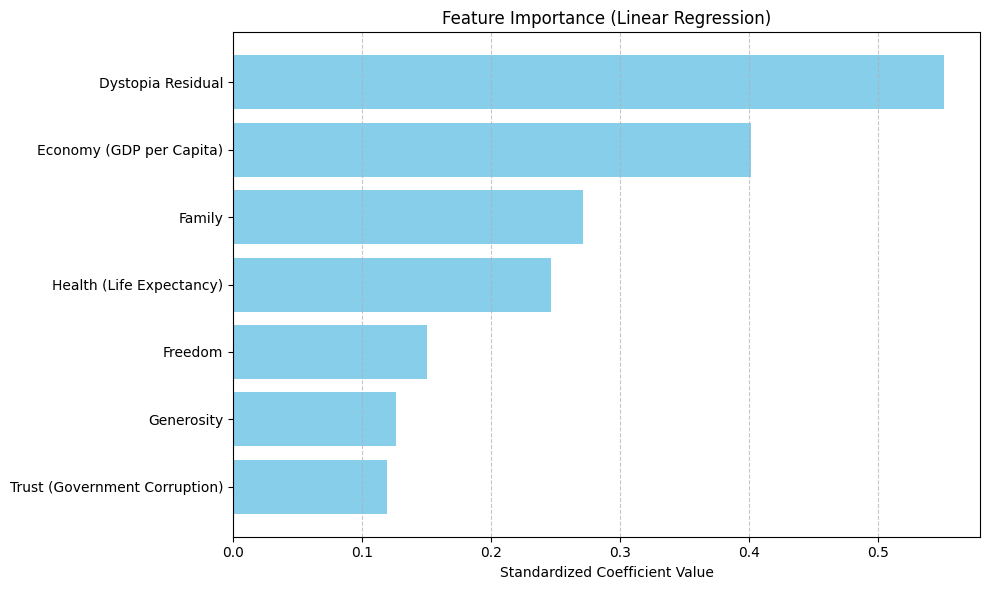

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

features = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Dystopia Residual'
]
X = df[features]
y = df['Happiness Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Linear Regression
model = LinearRegression()
model.fit(X_scaled, y)

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance (Coefficient)': model.coef_
}).sort_values(by='Importance (Coefficient)', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance (Coefficient)'], color='skyblue')
plt.xlabel('Standardized Coefficient Value')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

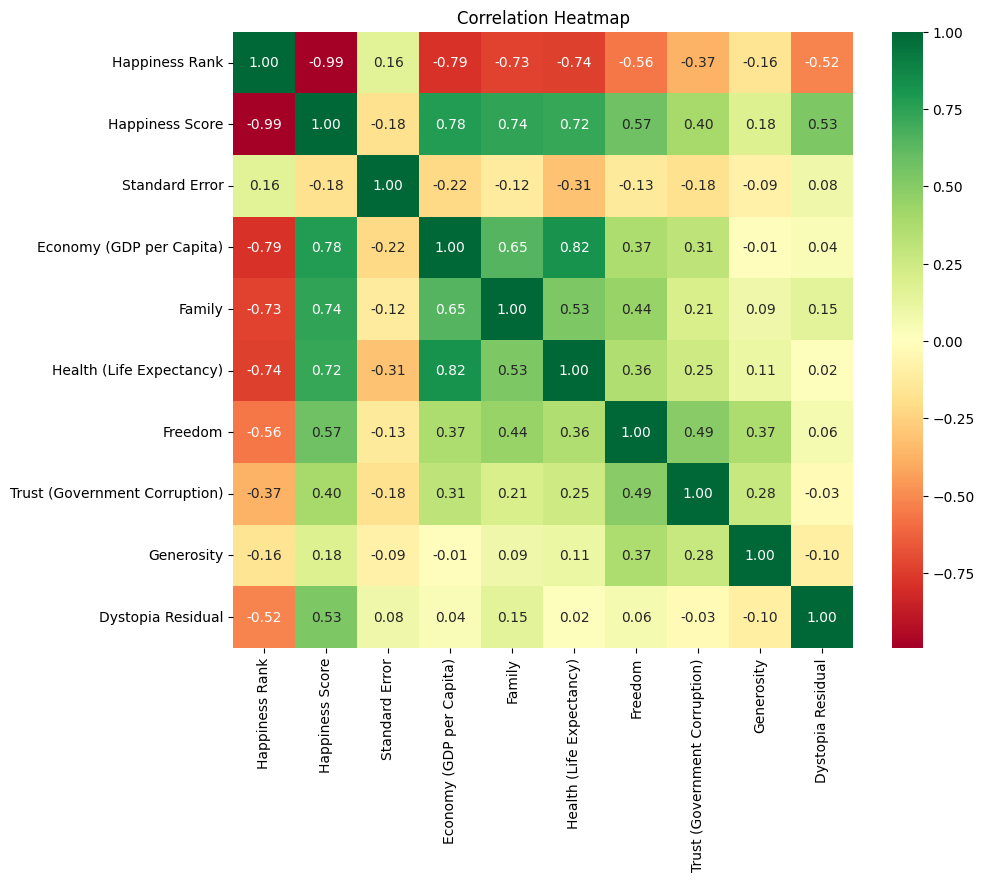

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.drop(columns=["Country", "Region"])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlGn", cbar=True)
plt.title("Correlation Heatmap")
plt.show()
